<h1>LPR License Plate Recognition - Plaka Tanıma Sistemi w CNN</h1>

In [ ]:
| Özellik                                      | OCR (Klasik)                                | CNN (Derin Öğrenme)                        |
| -------------------------------------------- | ------------------------------------------- | ------------------------------------------ |
| **Genel performans**                         | Sabit fontlar ve ideal koşullarda iyidir    | Gerçek dünya koşullarında çok daha iyi     |
| **Eğitim kabiliyeti**                        | Önceden tanımlı karakter setlerine bağlıdır | Yeni veriyle öğrenebilir, geliştirilebilir |
| **Gürültüye karşı dayanıklılık**             | Düşüktür                                    | Yüksektir                                  |
| **El yazısı / karmaşık plaka gibi durumlar** | Başarısız olabilir                          | Başarı ihtimali çok daha yüksek            |
| **Karmaşık arka plan**                       | Genellikle hata yapar                       | Daha iyi soyutlama yapabilir               |


Eğitim verisi: 864 görüntü
Doğrulama verisi: 216 görüntü
Epoch 1/100


C:\Users\Monster\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.0548 - loss: 3.5432 - val_accuracy: 0.2870 - val_loss: 3.2269
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.1715 - loss: 3.1117 - val_accuracy: 0.6296 - val_loss: 2.2335
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3657 - loss: 2.2565 - val_accuracy: 0.7500 - val_loss: 1.2698
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5922 - loss: 1.4911 - val_accuracy: 0.8426 - val_loss: 0.7683
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6454 - loss: 1.1082 - val_accuracy: 0.9074 - val_loss: 0.4557
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7778 - loss: 0.6960 - val_accuracy: 0.9259 - val_loss: 0.3151
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8519 - loss: 0.5669 - val_accuracy: 0.9306 - val_loss: 0.2806
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8644 - loss: 0.4294 - val_accuracy: 0.9630 - val_l

Model ve etiket çözücü kaydedildi.


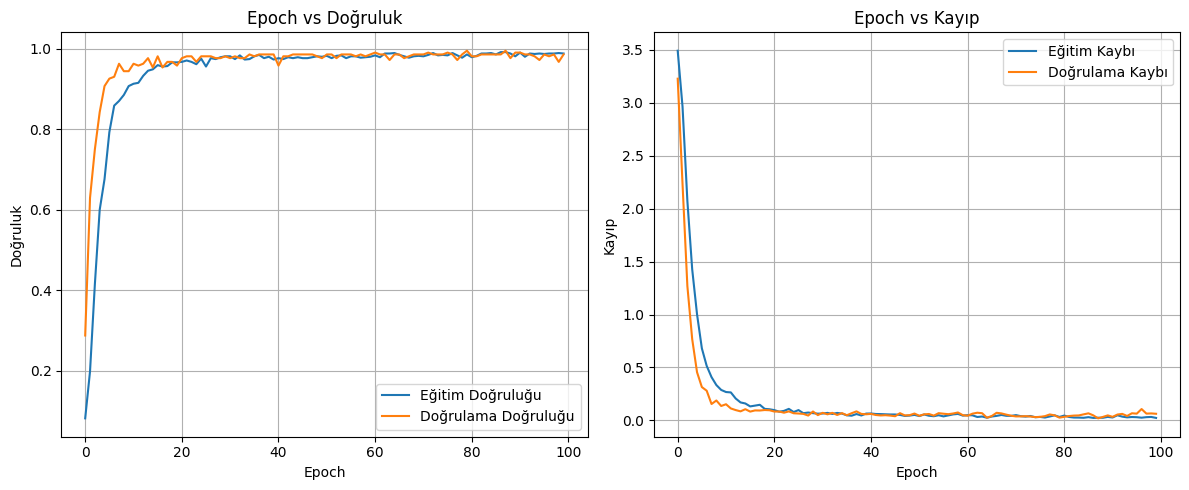

Eğitim geçmişi training_history.csv dosyasına kaydedildi.


In [2]:
# Kütüphaneler
import os
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Verilerin pathleri
TRAIN_DIR = "data/data/train"
VAL_DIR = "data/data/val"
IMG_SIZE = 28

# Veri yükleme fonksiyonu
def load_data(data_dir):
    X, y = [], []
    for folder in os.listdir(data_dir):
        label = folder.split("_")[-1]
        folder_path = os.path.join(data_dir, folder)
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X.append(img)
            y.append(label)
    return np.array(X), np.array(y)

#Verileri ayrıştırma
X_train, y_train = load_data(TRAIN_DIR)
X_val, y_val = load_data(VAL_DIR)

print(f"Eğitim verisi: {len(X_train)} görüntü")
print(f"Doğrulama verisi: {len(X_val)} görüntü")

# Normalizasyon
X_train = X_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1).astype("float32") / 255.0
X_val = X_val.reshape(-1, IMG_SIZE, IMG_SIZE, 1).astype("float32") / 255.0

# Etiket encode
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)
y_train_cat = to_categorical(y_train_encoded)
y_val_cat = to_categorical(y_val_encoded)

# Model tanımı
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Eğitimi başlat ve geçmişi kaydet
history = model.fit(X_train, y_train_cat, epochs=100, batch_size=64, validation_data=(X_val, y_val_cat))

# Model ve encoder kaydet
model.save("char_recognition_cnn.h5")
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

print("Model ve etiket çözücü kaydedildi.")

# Eğitim geçmişini grafikle göster
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Epoch vs Doğruluk')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Epoch vs Kayıp')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [3]:
import os #Dosya işlemleri için
import cv2 #Görsel üzerinde oynama yapmak için
import numpy as np #Sayısal işlemler için
import pickle #Kaydetme-Çağırma İşlemleri için
from tensorflow.keras.models import load_model #Önceden eğitilmiş modeli çağırmak için

#Pathler
MODEL_PATH = "char_recognition_cnn.h5"
ENCODER_PATH = "label_encoder.pkl"
IMG_SIZE = 28  # Modelin beklediği giriş boyutu

# Modeli ve çözücüyü (encoder)'ı yükle
model = load_model(MODEL_PATH)
with open(ENCODER_PATH, "rb") as f:
    label_encoder = pickle.load(f)


# Plakanın kaç karakterden oluştuğunu tahmin eden fonksiyon
def predict_character(char_img):
    gray = cv2.cvtColor(char_img, cv2.COLOR_BGR2GRAY) if len(char_img.shape) == 3 else char_img
    gray = cv2.bitwise_not(gray)  # Siyah-beyaz tersle
    #Yeniden boyutlandırma ve normalizasyon
    resized = cv2.resize(gray, (IMG_SIZE, IMG_SIZE))
    normalized = resized.astype("float32") / 255.0
    reshaped = normalized.reshape(1, IMG_SIZE, IMG_SIZE, 1)

    preds = model.predict(reshaped, verbose=0)
    class_index = np.argmax(preds)
    label = label_encoder.inverse_transform([class_index])[0]
    return label


# Segmentasyon - Ayırma Fonksiyonu
def segment_characters(plate_img):
    #Görseli griye ve tonlarına çevir
    gray = cv2.cvtColor(plate_img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    #Gürültü azaltma için bulanıklaştırma yapılır
    _, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    char_regions = []
    for cnt in contours:
        #Merkez X-Y ve genişlik/uzunluk bulmak
        x, y, w, h = cv2.boundingRect(cnt)
        #Yüksekliği plakanın %40’ından büyük ve genişliği %30’undan küçük olan bölgeler karakter olarak kabul edilir.
        if h > plate_img.shape[0] * 0.4 and w < plate_img.shape[1] * 0.3:
            char_regions.append((x, y, w, h))
    #Bazen karakterleri karışık verebileceğinden dolayı öncelikle sıralama işlemi yapılır.Kutular soldan sağa sıralanır.
    char_regions = sorted(char_regions, key=lambda box: box[0])

    chars = []
    debug_img = plate_img.copy()
    os.makedirs("debug_chars", exist_ok=True)

    for i, (x, y, w, h) in enumerate(char_regions):
        char_img = plate_img[y:y+h, x:x+w]
        chars.append(char_img)

        # Debug için kaydet
        cv2.rectangle(debug_img, (x, y), (x+w, y+h), (0, 255, 0), 1)
        cv2.imwrite(f"debug_chars/char_{i}.jpg", char_img)

    cv2.imwrite("debug_chars/segmented_plate.jpg", debug_img)
    print(f"{len(chars)} karakter bulundu ve debug_chars/ klasörüne kaydedildi.")
    return chars


# Plaka Tanıma Fonksyionu
def recognize_plate(image_path):
    plate_img = cv2.imread(image_path)
    if plate_img is None:
        raise FileNotFoundError(f"Plaka görüntüsü bulunamadı: {image_path}")
    #Görseldeki segmentasyona uğramış karakterler ayrıştırılır.
    char_images = segment_characters(plate_img)

    plate_text = ""
    for i, char_img in enumerate(char_images):
        try:
            char = predict_character(char_img)
            plate_text += char
            print(f"[Tahmin {i}] → {char}")
        except Exception as e:
            print(f"[HATA - {i}] Karakter tanıma hatası: {e}")

    return plate_text


# -> Test Örneği - Aynı zamanda başlarda çok sebepsiz hata aldığımdan hata yakalama için try/Catch
if __name__ == "__main__":
    image_path = "veriseti/deneme.png"
    try:
        result = recognize_plate(image_path)
        print("Tanınan Plaka:", result)
    except Exception as e:
        print("Hata:", e)


6 karakter bulundu ve debug_chars/ klasörüne kaydedildi.
[Tahmin 0] → 3
[Tahmin 1] → G
[Tahmin 2] → F
[Tahmin 3] → K
[Tahmin 4] → G
[Tahmin 5] → B
Tanınan Plaka: 3GFKGB
